In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
parties = ["DENK", "SP", "PvdD", "GroenLinks-PvdA", "Volt", "D66", "ChristenUnie", "NSC", "CDA", "SGP", "VVD", "BBB", "JA21", "PVV", "FVD"]

In [34]:
df = pd.read_json('data/dataset.json')
df = pd.json_normalize(df['motions']).set_index('id')
df['title'] = df['title'].str.replace('\nMotie\n:\n', '')
df['title'] = df['title'].str.replace('\nMotie (gewijzigd/nader)\n:\n', '')
df = df.dropna()
df

,did,url,title,votes
id,,,,
2025Z19052,2025D44381,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid Ceder c.s. over ...,"[{'party': 'BBB', 'seats': 8, 'vote': 'Voor'},..."
2025Z19055,2025D44384,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid Van der Plas ove...,"[{'party': 'BBB', 'seats': 8, 'vote': 'Voor'},..."
2025Z19051,2025D44380,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid Ceder over ervoo...,"[{'party': 'BBB', 'seats': 8, 'vote': 'Tegen'}..."
2025Z19054,2025D44383,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid De Vos over zich...,"[{'party': 'BBB', 'seats': 8, 'vote': 'Voor'},..."
2025Z19053,2025D44382,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid De Vos over niet...,"[{'party': 'BBB', 'seats': 8, 'vote': 'Tegen'}..."
...,...,...,...,...
2024Z18082,2024D43252,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van de leden Bruyning en Ced...,"[{'party': 'BBB', 'seats': 7, 'vote': 'Voor'},..."
2024Z18080,2024D43250,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid Bruyning c.s. ov...,"[{'party': 'BBB', 'seats': 7, 'vote': 'Voor'},..."
2024Z18072,2024D43242,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid Westerveld over ...,"[{'party': 'BBB', 'seats': 7, 'vote': 'Voor'},..."


In [35]:
df = df.explode('votes')
vote_data = pd.json_normalize(df['votes'])
df = pd.concat([df[['did', 'url', 'title']].reset_index(), vote_data], axis=1)
df = df.pivot_table(
    index=['id', 'did', 'url', 'title'],
    columns='party',
    values='vote',
    aggfunc='first'
).reset_index()
df.columns.name = None
df = df.set_index('id')
df

,did,url,title,BBB,CDA,ChristenUnie,D66,DENK,FVD,GroenLinks-PvdA,JA21,NSC,PVV,PvdD,SGP,SP,VVD,Volt
id,,,,,,,,,,,,,,,,,,
2024Z17735,2024D42599,https://www.tweedekamer.nl/kamerstukken/moties...,Gewijzigde motie van de leden Mutl...,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor
2024Z17814,2024D42729,https://www.tweedekamer.nl/kamerstukken/moties...,Gewijzigde motie van het lid Kathm...,Tegen,Tegen,Tegen,Voor,Voor,Voor,Voor,Tegen,Tegen,Tegen,Voor,Tegen,Tegen,Tegen,Voor
2024Z17881,2024D42842,https://www.tweedekamer.nl/kamerstukken/moties...,Gewijzigde motie van het lid Mutlu...,Tegen,Voor,Tegen,Voor,Voor,Tegen,Voor,Tegen,Voor,Tegen,Voor,Tegen,Voor,Tegen,Voor
2024Z17920,2024D42926,https://www.tweedekamer.nl/kamerstukken/moties...,Gewijzigde motie van de leden Kops...,Voor,Tegen,Tegen,Tegen,Tegen,Voor,Tegen,Voor,Voor,Voor,Tegen,Voor,Voor,Voor,Tegen
2024Z17921,2024D42927,https://www.tweedekamer.nl/kamerstukken/moties...,Gewijzigde motie van de leden Kops...,Voor,Tegen,Voor,Voor,Voor,Tegen,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025Z19052,2025D44381,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid Ceder c.s. over ...,Voor,Voor,Voor,Voor,Tegen,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor
2025Z19053,2025D44382,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid De Vos over niet...,Tegen,Tegen,Tegen,Tegen,Tegen,Voor,Tegen,Tegen,Tegen,Voor,Tegen,Tegen,Tegen,Tegen,Tegen
2025Z19054,2025D44383,https://www.tweedekamer.nl/kamerstukken/moties...,Motie van het lid De Vos over zich...,Voor,Tegen,Tegen,Tegen,Tegen,Voor,Tegen,Voor,Tegen,Voor,Tegen,Voor,Voor,Tegen,Tegen


In [36]:
votes = df[parties]
votes

,DENK,SP,PvdD,GroenLinks-PvdA,Volt,D66,ChristenUnie,NSC,CDA,SGP,VVD,BBB,JA21,PVV,FVD
id,,,,,,,,,,,,,,,
2024Z17735,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor
2024Z17814,Voor,Tegen,Voor,Voor,Voor,Voor,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Voor
2024Z17881,Voor,Voor,Voor,Voor,Voor,Voor,Tegen,Voor,Voor,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen
2024Z17920,Tegen,Voor,Tegen,Tegen,Tegen,Tegen,Tegen,Voor,Tegen,Voor,Voor,Voor,Voor,Voor,Voor
2024Z17921,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Tegen,Voor,Voor,Voor,Voor,Voor,Tegen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025Z19052,Tegen,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor,Voor
2025Z19053,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Voor,Voor
2025Z19054,Tegen,Voor,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Tegen,Voor,Tegen,Voor,Voor,Voor,Voor


In [37]:
def calculate_similarity(party1_votes, party2_votes):
    """Calculate the percentage of times two parties voted the same way"""
    valid_mask = ~(party1_votes.isna() | party2_votes.isna())
    if valid_mask.sum() == 0:
        return 0.0
    agreements = (party1_votes[valid_mask] == party2_votes[valid_mask]).sum()
    total_comparisons = valid_mask.sum()
    return (agreements / total_comparisons) * 100

similarity_matrix = pd.DataFrame(index=parties, columns=parties, dtype=float)

for party1 in parties:
    for party2 in parties:
        if party1 == party2:
            similarity_matrix.loc[party1, party2] = 100.0
        else:
            similarity = calculate_similarity(votes[party1], votes[party2])
            similarity_matrix.loc[party1, party2] = similarity

similarity_matrix = similarity_matrix.round(1)
similarity_matrix

,DENK,SP,PvdD,GroenLinks-PvdA,Volt,D66,ChristenUnie,NSC,CDA,SGP,VVD,BBB,JA21,PVV,FVD
DENK,100.0,83.7,81.4,81.8,80.0,74.9,70.1,60.7,59.1,55.1,48.5,49.3,46.8,41.9,49.8
SP,83.7,100.0,86.4,85.3,80.7,76.3,71.5,62.1,59.2,54.5,48.8,49.6,47.4,41.0,47.6
PvdD,81.4,86.4,100.0,87.2,82.9,75.6,67.6,57.9,56.6,49.9,45.1,43.4,41.5,36.1,41.0
GroenLinks-PvdA,81.8,85.3,87.2,100.0,90.0,85.4,75.9,65.3,64.9,57.1,53.3,49.9,47.8,39.1,43.5
Volt,80.0,80.7,82.9,90.0,100.0,88.4,76.8,67.1,67.0,59.0,55.7,51.8,49.8,39.4,42.8
D66,74.9,76.3,75.6,85.4,88.4,100.0,78.2,71.9,73.3,63.9,63.1,57.5,54.2,43.4,44.4
ChristenUnie,70.1,71.5,67.6,75.9,76.8,78.2,100.0,78.3,77.4,75.5,68.1,67.3,62.5,53.5,52.3
NSC,60.7,62.1,57.9,65.3,67.1,71.9,78.3,100.0,78.0,75.3,77.9,75.0,65.4,61.0,54.6
CDA,59.1,59.2,56.6,64.9,67.0,73.3,77.4,78.0,100.0,74.7,77.9,71.6,64.6,57.6,52.2
SGP,55.1,54.5,49.9,57.1,59.0,63.9,75.5,75.3,74.7,100.0,74.5,77.3,72.8,66.3,61.4


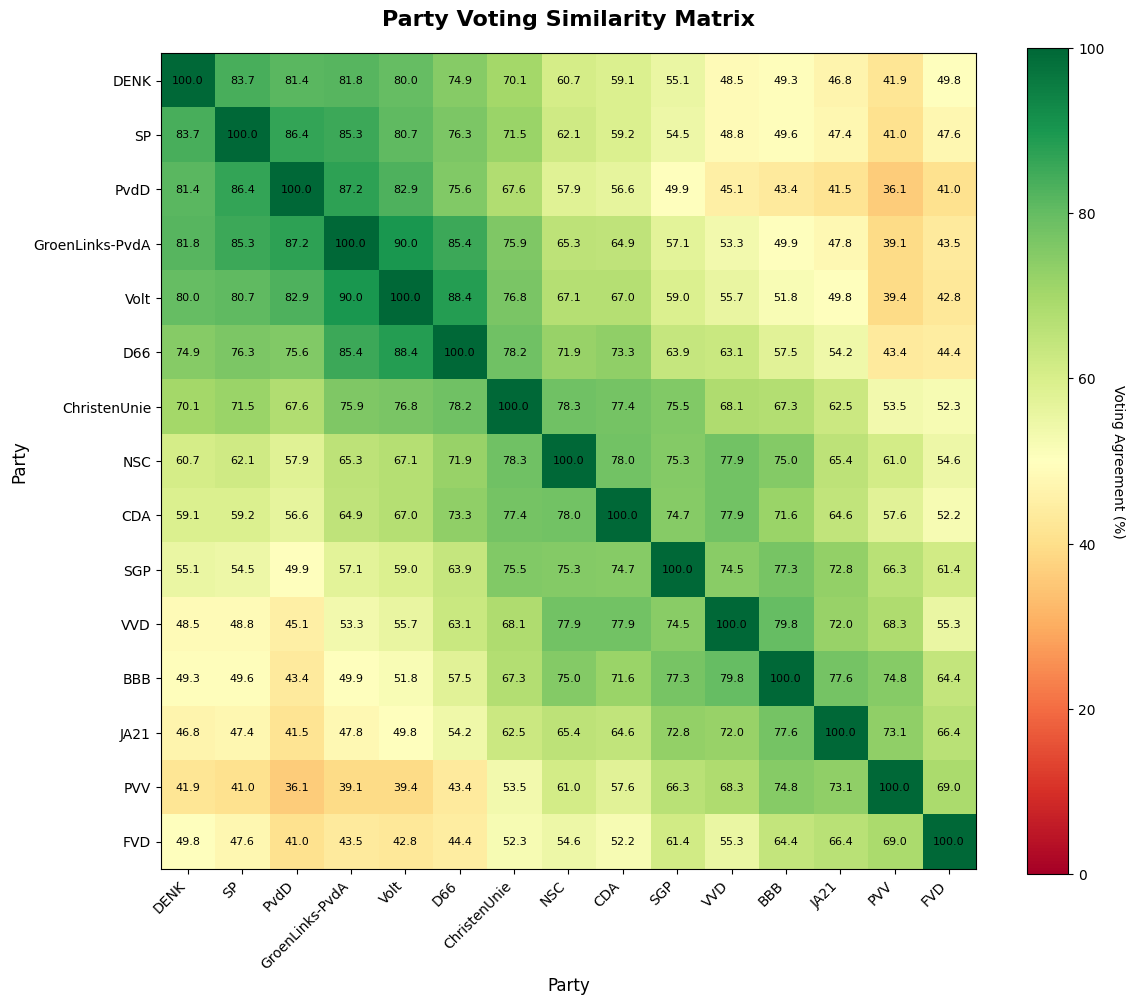

In [38]:
fig, ax = plt.subplots(figsize=(12, 10))
matrix_values = similarity_matrix.astype(float).values
im = ax.imshow(matrix_values, cmap='RdYlGn', aspect='equal', vmin=0, vmax=100)

ax.set_xticks(range(len(parties)))
ax.set_yticks(range(len(parties)))
ax.set_xticklabels(parties, rotation=45, ha='right')
ax.set_yticklabels(parties)

for i in range(len(parties)):
    for j in range(len(parties)):
        text = ax.text(j, i, f'{matrix_values[i, j]:.1f}',
                       ha="center", va="center", color="black", fontsize=8)

cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Voting Agreement (%)', rotation=270, labelpad=15)

ax.set_title('Party Voting Similarity Matrix', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Party', fontsize=12)
ax.set_ylabel('Party', fontsize=12)

plt.tight_layout()
plt.show()

In [32]:
similarity_matrix.to_json("data/matrix.json")